<a href="https://colab.research.google.com/github/ruforavishnu/Project_Machine_Learning/blob/master/Project_10_TensorFlow-Stock_Price_Prediction_using_LSTM_(Recurrent_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf


Get the Stock Price Data

In [5]:
# Define the  stock ticker and time period
ticker = 'TSLA'
start_date = '2010-01-01'
end_date = '2025-01-01'

# Fetch historical data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# show  few rows of our data
data.tail()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000
2024-12-31,403.839996,427.929993,402.540009,423.790009,76825100


In [8]:
data_close = data['Close']

# lets normalize the closing price using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_close.values.reshape(-1,1))

print(scaled_data)

[[1.12641280e-03]
 [1.11805880e-03]
 [8.57688465e-04]
 ...
 [8.99333099e-01]
 [8.69571608e-01]
 [8.41230299e-01]]


In [10]:
#create a sequence of 60days to predict next day's price
def create_sequences(data, time_steps=60):
  X, y = [], []

  for i in range(time_steps, len(data)):
    X.append(data[i - time_steps: i, 0]) #input is the previous 60 days
    y.append(data[i,0]) # output is the next day's price

  return np.array(X), np.array(y)



# Generate sequences
X, y = create_sequences(scaled_data)

# Reshape X for LSTM model input (samples,  time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)


#now lets split our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)


#show the shapes of our data now
print(X_train.shape, X_test.shape)



(2873, 60, 1) (719, 60, 1)


Build the LSTM model


In [11]:
#Initialize the LSTM model
model = Sequential()

#first lstm layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)  ))
model.add(Dropout(0.2))

#second lstm layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))


# output layer - a single unit for predicting our closing price
model.add(Dense(units=1))

#now lets compile our model
model.compile(optimizer='adam', loss='mean_squared_error')

#show model summary
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0085
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 7.1718e-04
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 6.8247e-04
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 5.5594e-04
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 6.2482e-04
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 6.4790e-04
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 6.1354e-04
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 4.9013e-04
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 4.2659e-04
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 6.0569e-04
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 4.7306e-04
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 4.2302e-04
Epoch 13/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 4.8205e-04
Epoch 14/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 3.7717e-04
Epoch 15/20
90

Now lets try making predictions


In [13]:
predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))



23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


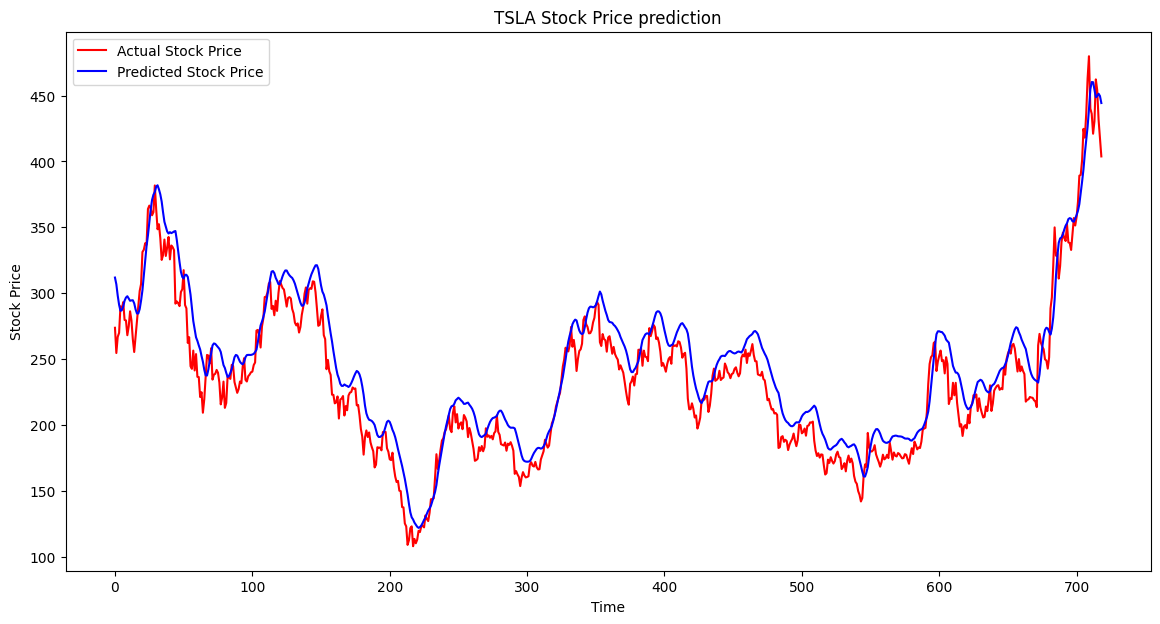

In [14]:
plt.figure(figsize=(14,7))
plt.plot(y_test_actual, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Now lets evaluate the model


In [15]:
from sklearn.metrics import mean_squared_error
import math

#calculate root mean squared error
rmse = math.sqrt(mean_squared_error(y_test_actual, predicted_stock_price))
print(f'Root Mean Squared Error: {rmse}')



Root Mean Squared Error: 19.814062607258723


Congrats. We have successfully created a AI model which predicts our future stock price. In this case we have 19.914 as our Root mean squared error. means our prediction of the stock price is off by just $19.8.
Which is quite good.

In [26]:
# Get the latest actual price (last value in the original dataset)
latest_actual_price = int(data['Close'].values[-1])

# Calculate the percentage error compared to the actual price
percentage_error = (rmse / latest_actual_price) * 100


print(f'\nThe latest actual stock price is: $ {latest_actual_price:.2f}')
print(f"Our model's average error (${rmse:.2f}) is about {percentage_error:.2f}% of the stock price.")





The latest actual stock price is: $ 403.00
Our model's average error ($19.81) is about 4.92% of the stock price.


<ipython-input-26-82faf60480b8>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  latest_actual_price = int(data['Close'].values[-1])
